# MSDS 670 Midterm Project
<br>Wiley Winters
<br>Regis University Anderson College of Business and Computing
<br>MSDS 670 Data Visualization
<br>Mr. John Koenig
<br>Febrary 11, 2024
### Research Question:
*Do birth and death rates affect total population in the top ten economies?*


-----------------------------------------------------------------------
Load required packages and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#
# Pandas has not been playing nice with this project
# Adding options to display numbers in float format
# and supress warnings on copy on write functions,
# 
pd.options.display.float_format = '{:.0f}'.format
pd.options.mode.copy_on_write = True
#
# Make plots pretty
#
plt.style.use('ggplot')

Define path names

In [2]:
homeDir = '/home/wiley/regis/dataScience/msds670'
data = homeDir+'/MidTermProject/MSDS-670-MidTerm-Project/data/worldPopulationData.csv'
images = homeDir+'/MidTermProject/MSDS-670-MidTerm-Project/images/'

Load dataset into a dataframe and rename columns

In [3]:
# Do not like the column names supplied by Data Bank.  Using shorter column names
# to avoid confusion
columns = ['country','cntry_code','series','series_code','1960','1965','1970',
           '1975','1980','1985','1990','1995','2000','2005','2010','2015','2020',
           '2022','2023','2024']
world_df = pd.read_csv(data, skiprows=1, names=columns,
                       na_values='..')

----------------------------------------------------------------------------------
## Basic EDA

In [4]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      50 non-null     object 
 1   cntry_code   50 non-null     object 
 2   series       50 non-null     object 
 3   series_code  50 non-null     object 
 4   1960         40 non-null     float64
 5   1965         50 non-null     float64
 6   1970         50 non-null     float64
 7   1975         50 non-null     float64
 8   1980         50 non-null     float64
 9   1985         50 non-null     float64
 10  1990         50 non-null     float64
 11  1995         50 non-null     float64
 12  2000         50 non-null     float64
 13  2005         50 non-null     float64
 14  2010         50 non-null     float64
 15  2015         50 non-null     float64
 16  2020         50 non-null     float64
 17  2022         30 non-null     float64
 18  2023         20 non-null     float64
 19  2024      

In [5]:
world_df.head(10)

,country,cntry_code,series,series_code,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2022,2023,2024
0,Brazil,BRA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,44,40,36,33,32,29,25,22,20,17,15,15,13,NaN,NaN,NaN
1,Brazil,BRA,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,14,12,11,10,9,8,7,7,6,6,6,6,7,NaN,NaN,NaN
2,Brazil,BRA,"Population ages 65 and above, total",SP.POP.65UP.TO,1921246,2437203,3066987,3795103,4642501,5558148,6729875,8134166,9679708,11461295,13563871,16222681,19807547,21265888,22101851,23039580
3,Brazil,BRA,Population growth (annual %),SP.POP.GROW,NaN,3,2,2,2,2,2,2,1,1,1,1,1,0,NaN,NaN
4,Brazil,BRA,"Population, total",SP.POP.TOTL,73092515,84623747,96369875,108700515,122288383,136783180,150706446,163515328,175873720,186797334,196353492,205188205,213196304,215313498,216422446,217637297
5,Canada,CAN,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,27,21,17,16,15,15,15,13,11,11,11,11,10,NaN,NaN,NaN
6,Canada,CAN,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,8,8,7,7,7,7,7,7,7,7,7,7,8,NaN,NaN,NaN
7,Canada,CAN,"Population ages 65 and above, total",SP.POP.65UP.TO,1373988,1519291,1702610,1960638,2302843,2644549,3108392,3493208,3831961,4190005,4782333,5715697,6848293,7410039,7670567,7932928
8,Canada,CAN,Population growth (annual %),SP.POP.GROW,NaN,2,1,1,1,1,2,1,1,1,1,1,1,2,NaN,NaN
9,Canada,CAN,"Population, total",SP.POP.TOTL,17909356,19678000,21324000,23143275,24515667,25842116,27691138,29302311,30685730,32243753,34004889,35702908,38007166,38929902,39244168,39555364


In [6]:
world_df.isna().sum()

country         0
cntry_code      0
series          0
series_code     0
1960           10
1965            0
1970            0
1975            0
1980            0
1985            0
1990            0
1995            0
2000            0
2005            0
2010            0
2015            0
2020            0
2022           20
2023           30
2024           30
dtype: int64

------------------------------------------------------------------------------------
## Some basic data cleaning

The columns `cntry_code`, `series`, and `series_code` are not required for this study.  `1960` column contained some null values in the % growth series.  There is not enough data to extrapulate their values so I will just drop it.  Should not make too much of a difference on the final product

In [7]:
world_df.drop(['cntry_code','series','series_code'], inplace=True, axis=1)

-----------------------------------------------------------------------------
## Do some work

The format of the dataset is different from other timeseries studies I've worked with.  The first four columns are the country's name and country code.  The next two are the series and the series code.  Rest of the columns are the years and values being studied.

Due to the number of plots to be created, I will make a list of countries in this study.  The list is in order from the largest GDP to the lowest of the top ten economies.

In [8]:
countries = ['United States','China','Germany','Japan','India','United Kingdom',
             'France','Italy','Brazil','Canada']

-----------------------------------------------------------------------
### Define Functions

In [9]:
# Function to create dataframes based on country, then drop
# column that is not used.
# Accepts country name and returns the country datafram (series)
def formatSeries(country):
    cntry = world_df[world_df['country'] == country]
    cntry.drop('country', inplace=True, axis=1)
    return cntry

In [10]:
# Funtion to scale population data by millions.
# Accepts the population number and returns a scaled
# version of it
def scalePopulation(population):
    scaled = population.apply(lambda x: x/1000000)
    return scaled    

In [11]:
# Function to plot birth and death rates for each country
# Accepts country name, but does not return anything
def plotBirthDeath(country):
    cntry = formatSeries(country)
    birth = cntry.iloc[0]
    death = cntry.iloc[1]
    plt.figure(figsize=(10,6))
    title = 'Birth and Death Rates per 1000 ('+country+')'
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Rate/1000')
    plt.plot(birth, color='darkorange', label='Births', marker='o')
    plt.plot(death, color='blue', label='Deaths', marker='o')
    plt.legend()
    plt.plot()
    if country == 'United States':
        fileName = images+'usBirthDeathRate.png'
    elif country == 'United Kingdom':
        fileName = images+'ukBirthDeathRate.png'
    else:
        fileName = images+country+'BirthDeathRate.png'
    plt.savefig(fileName, format='png')

In [12]:
# Function to plot the over 65 population of a country
# Accepts country name, but does not return anything
def plotOver65(country):
    cntry = formatSeries(country)
    over65 = cntry.iloc[2]
    total = cntry.iloc[4]
    # Scale populations to make graph easier to read
    over65_scaled = scalePopulation(over65)
    total_scaled = scalePopulation(total)
    plt.figure(figsize=(10,6))
    title = 'Total Population and Over 65 ('+country+')'
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Population in Millions')
    plt.plot(over65_scaled, color='black', label='Over 65', marker='o')
    plt.plot(total_scaled, color='blue', label='Total', marker='o')
    plt.legend()
    plt.plot()
    if country == 'United States':
        fileName = images+'usTotalandOver65.png'
    elif country == 'United Kingdom':
        fileName = images+'ukTotalandOver65.png'
    else:
        fileName = images+country+'TotalandOver65.png'
    plt.savefig(fileName, format='png')    

In [13]:
# Function to plot growth in percent
# Accepts country name and returns nothing
def plotGrowth(country):
    cntry = formatSeries(country)
    growth = cntry.iloc[3]
    plt.figure(figsize=(10,6))
    title = 'Growth in Percent ('+country+')'
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Percent of Growth')
    plt.plot(growth, color='black', label='Over 65', marker='o')
    plt.legend()
    plt.plot()
    if country == 'United States':
        fileName = images+'usGrowthPercent.png'
    elif country == 'United Kingdom':
        fileName = images+'ukGrowthPercent.png'
    else:
        fileName = images+country+'GrowthPercent.png'
    plt.savefig(fileName, format='png')    

In [14]:
# Function to extract the different series from the countries dataframe
# Accepts country name and returns series: birth, death, over65, and total
def getIndividual(country):
    cntry = formatSeries(country)
    birth = cntry.iloc[0]
    death = cntry.iloc[1]
    over65 = cntry.iloc[2]
    growth = cntry.iloc[3]
    total = cntry.iloc[4]
    return birth, death, over65, growth, total

--------------------------------------------------------------------
### Create individual plots

Plot birth and death rates

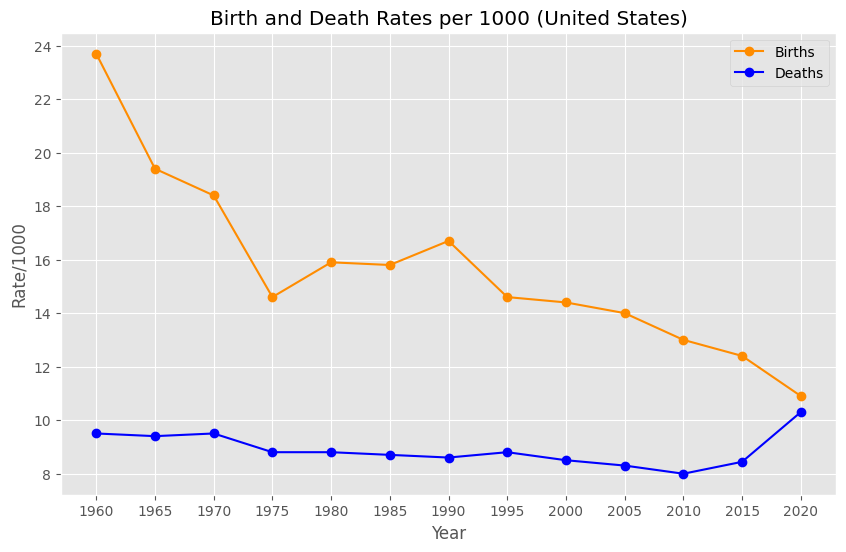

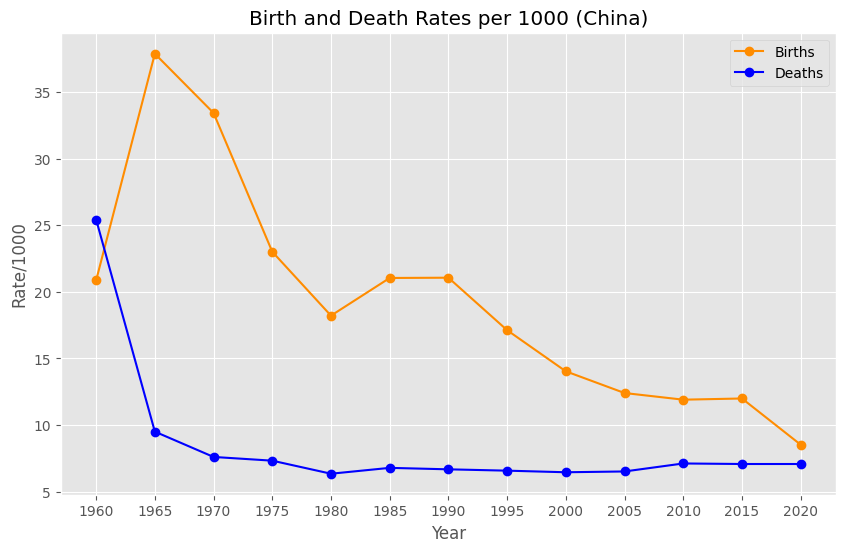

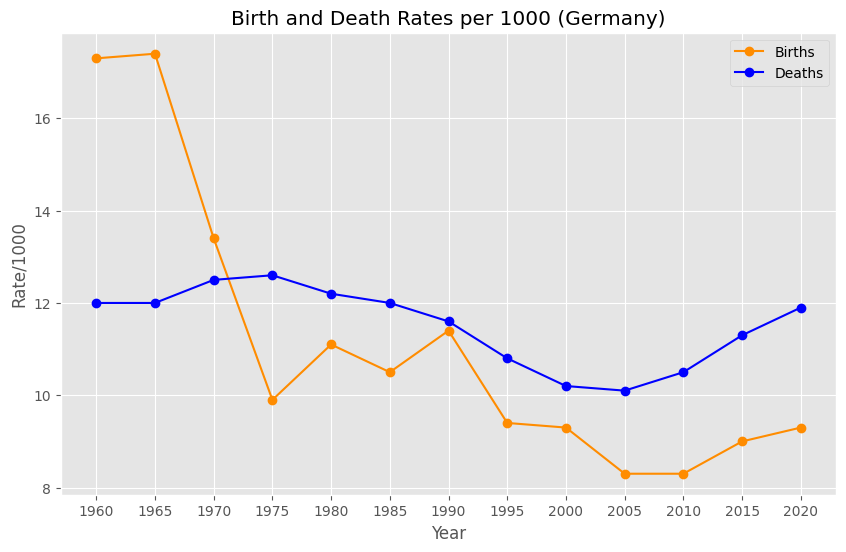

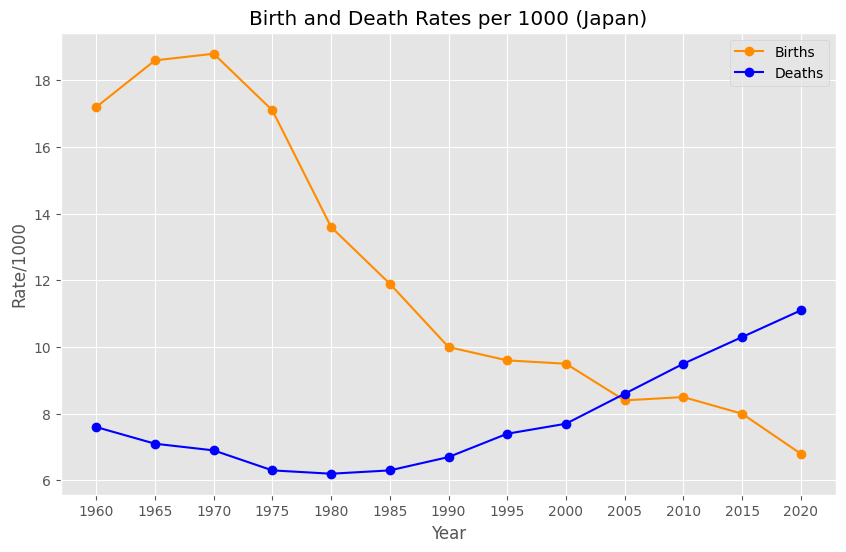

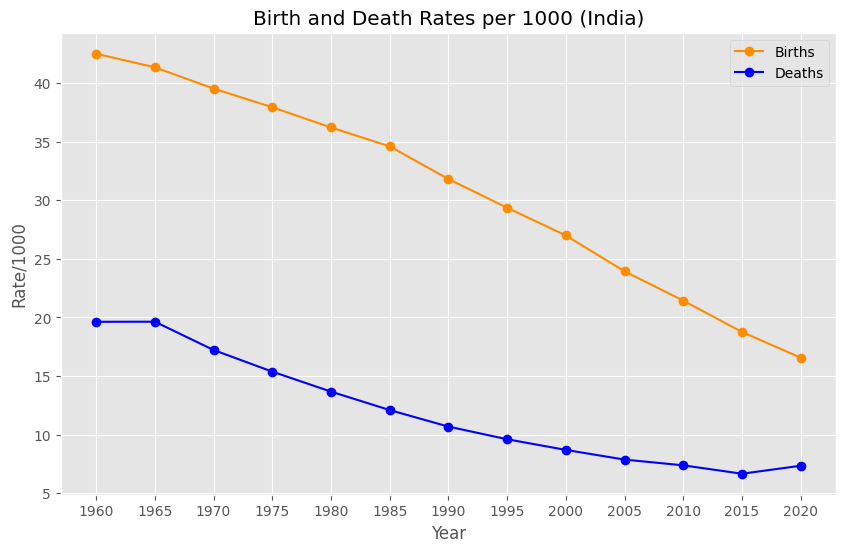

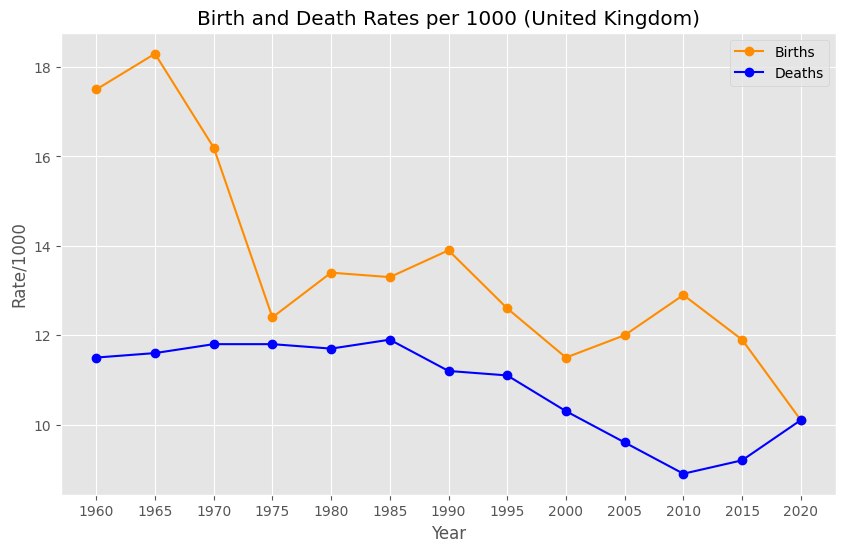

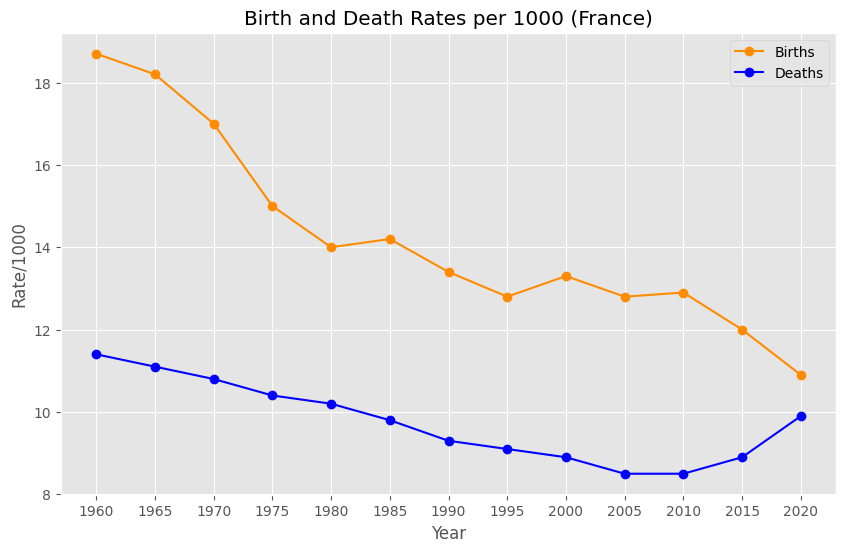

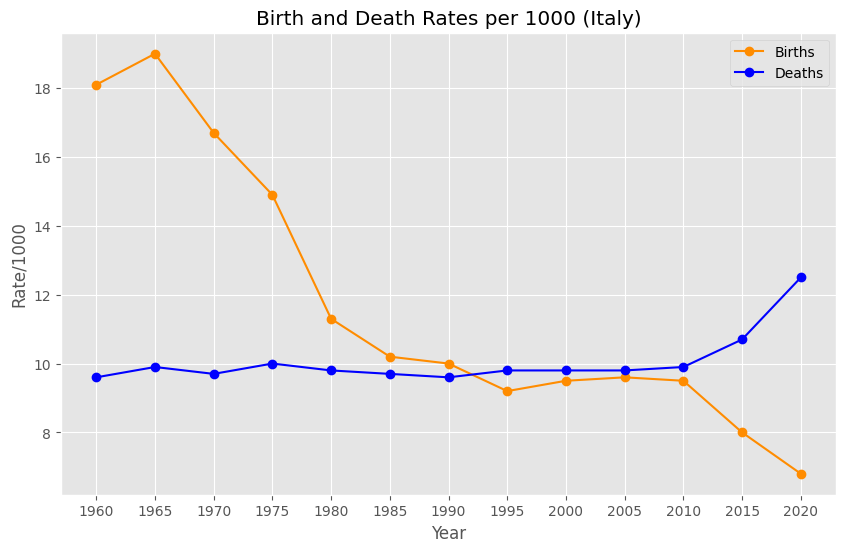

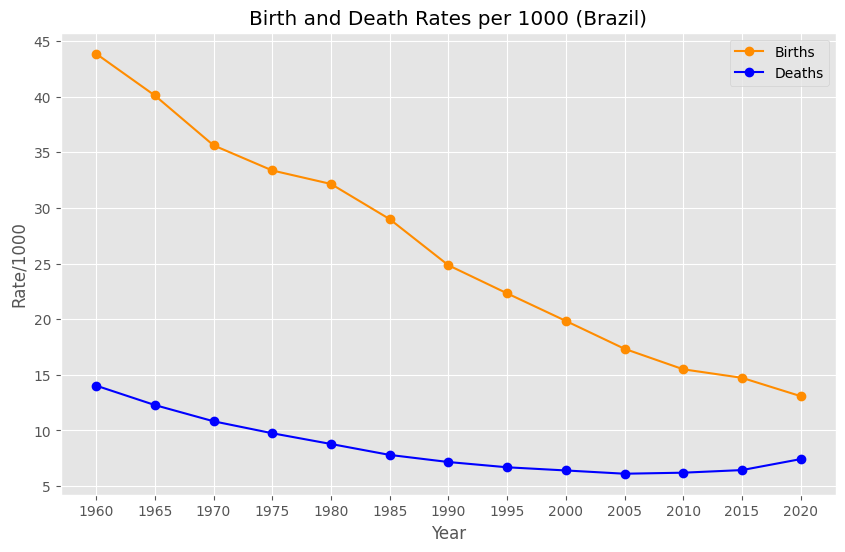

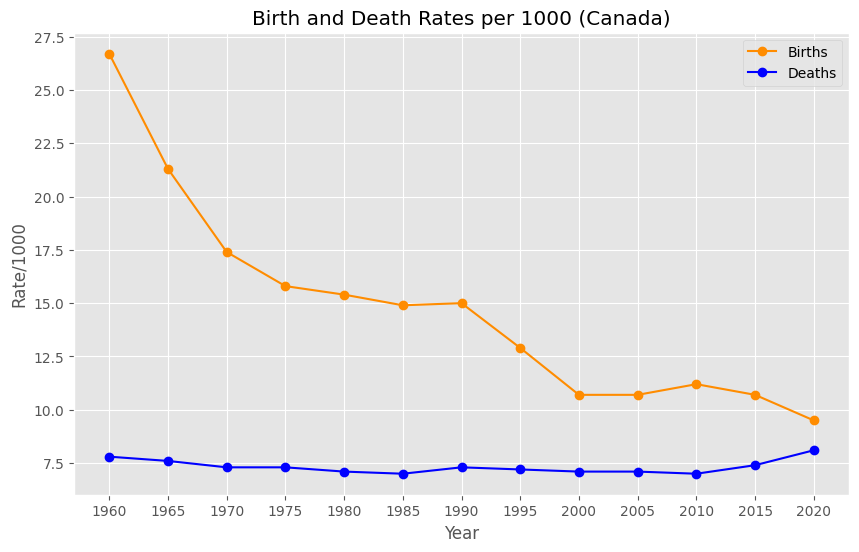

In [15]:
for country in countries:
    plotBirthDeath(country)

Plot total and over 65 population

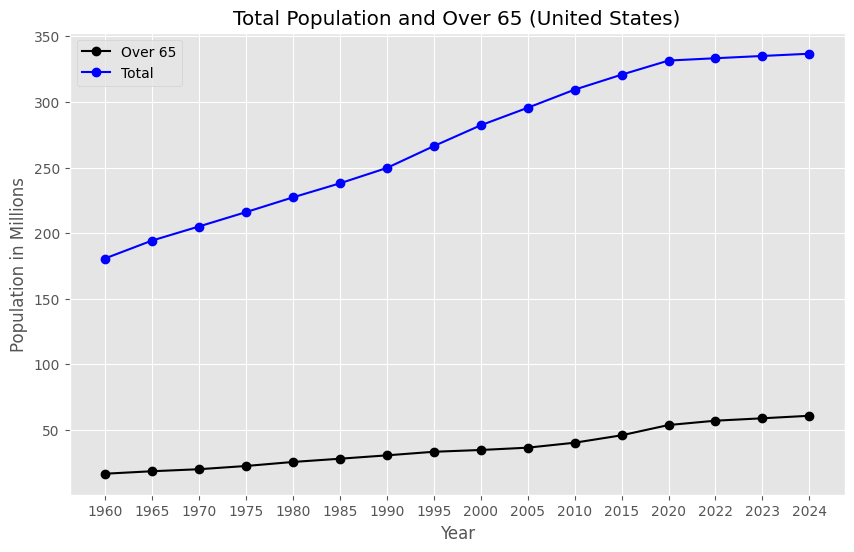

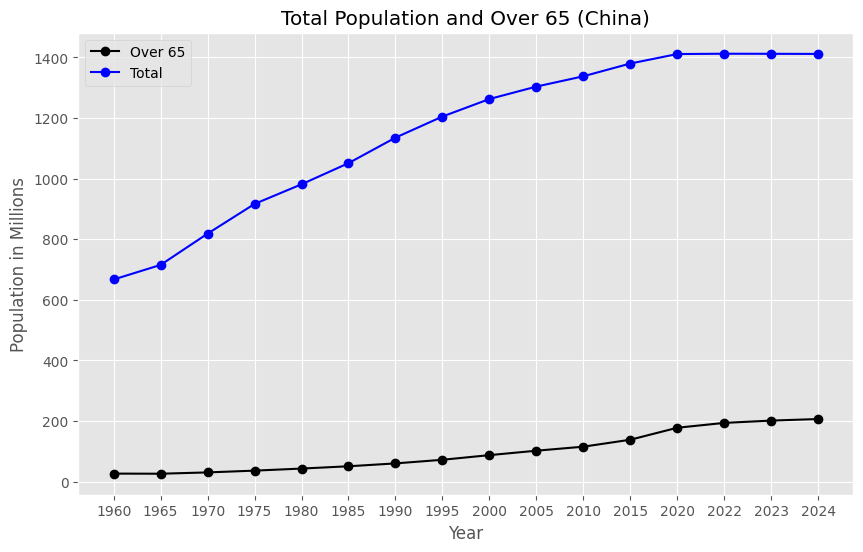

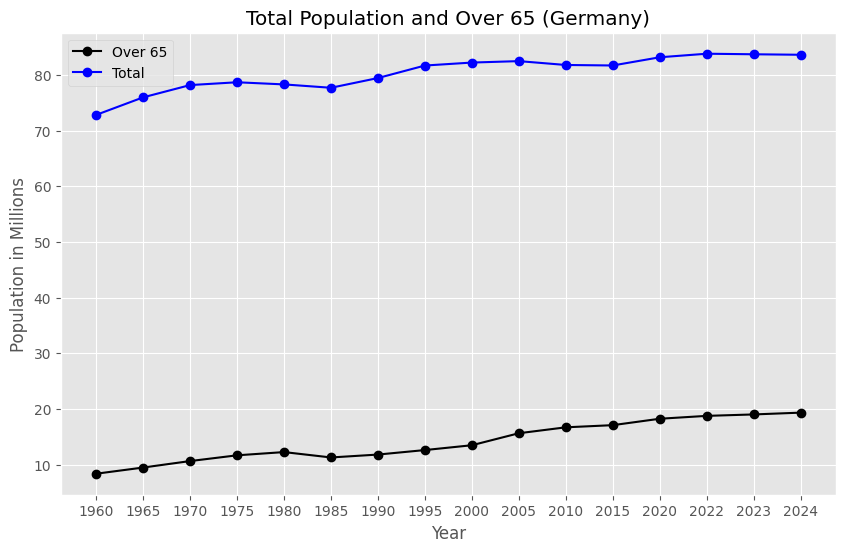

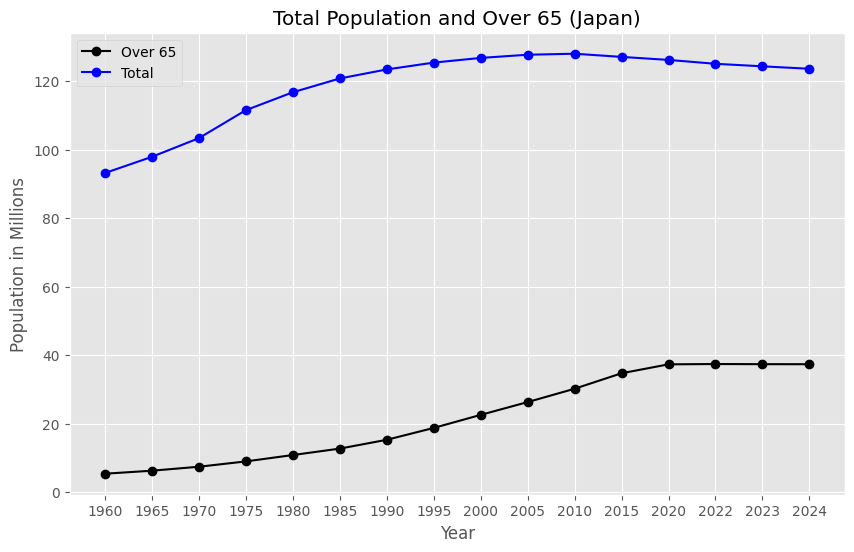

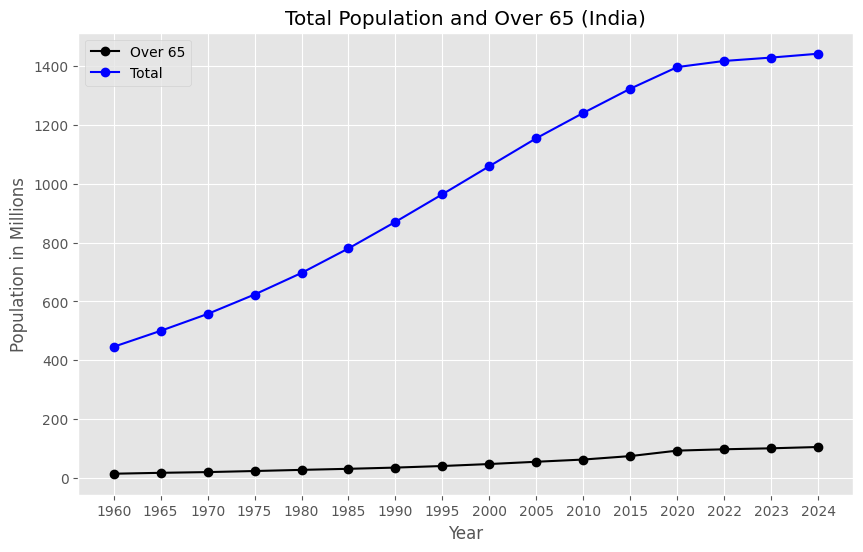

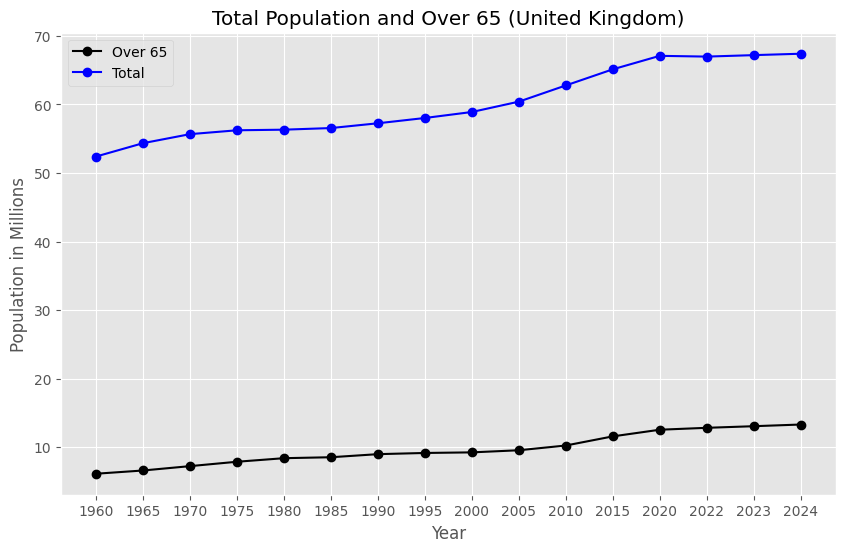

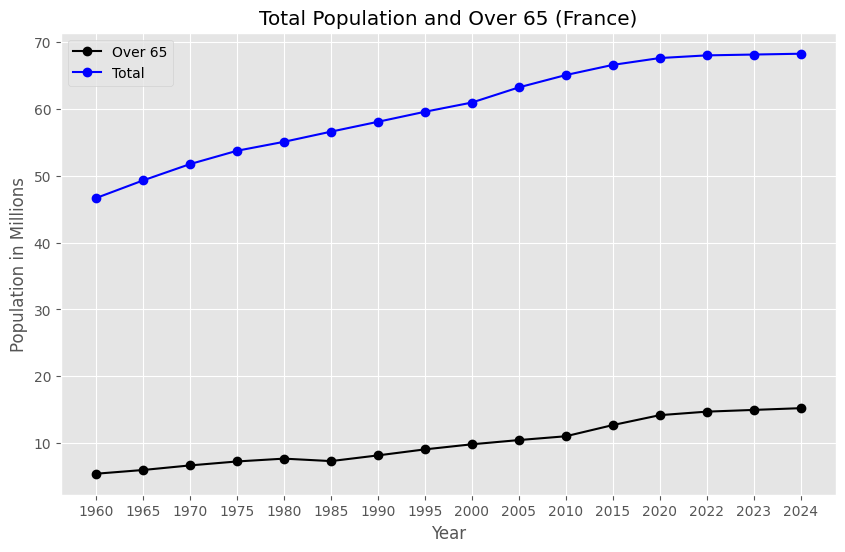

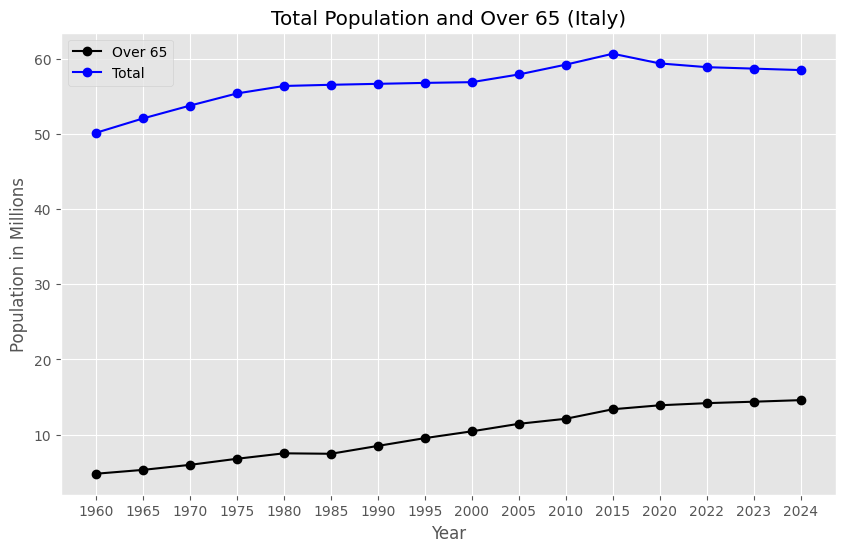

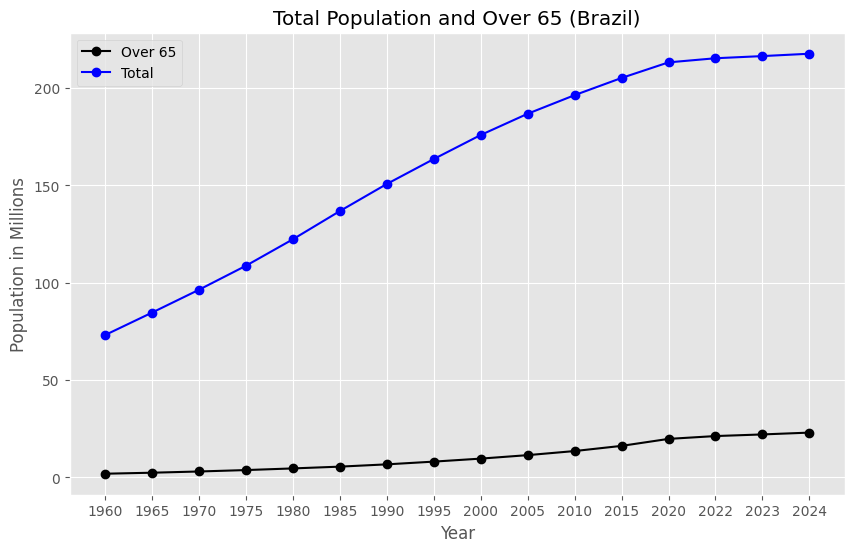

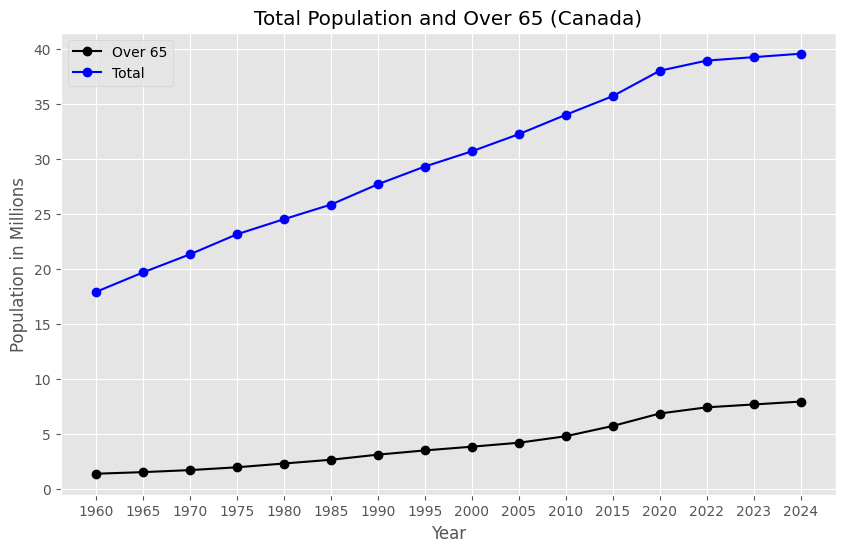

In [16]:
for country in countries:
    plotOver65(country)

Plot growth rate

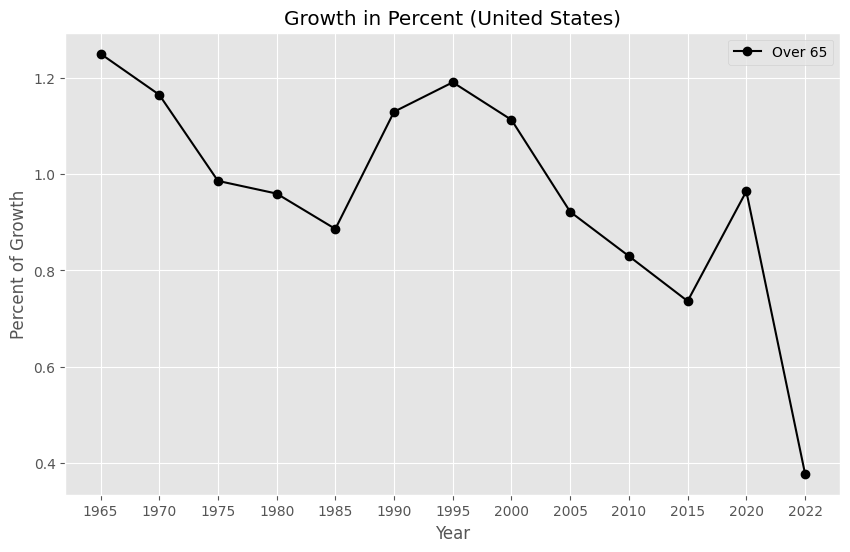

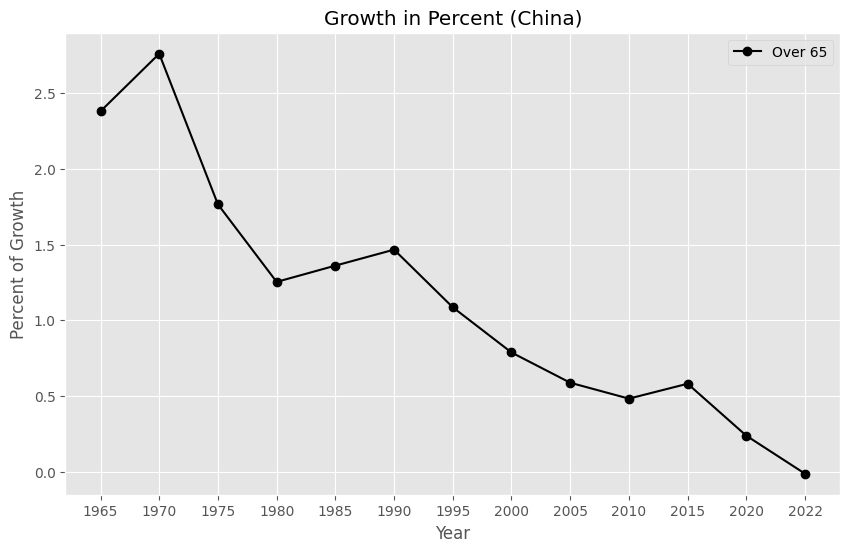

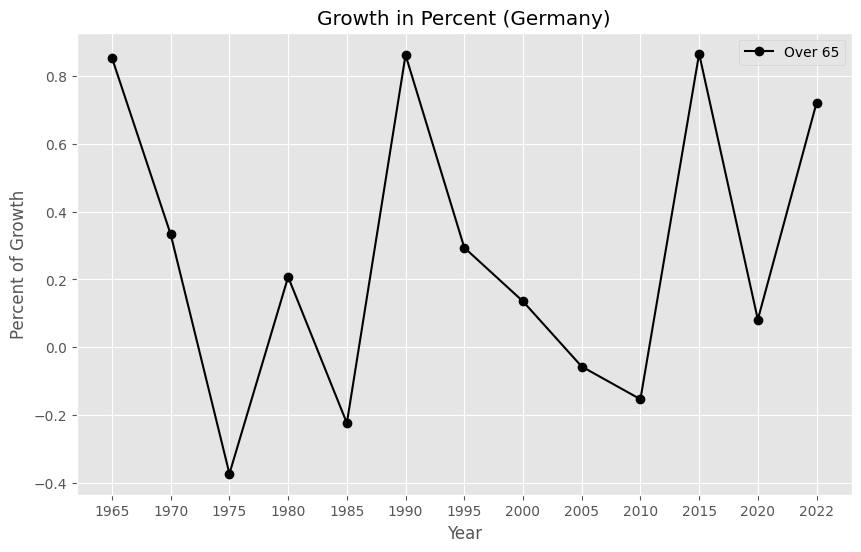

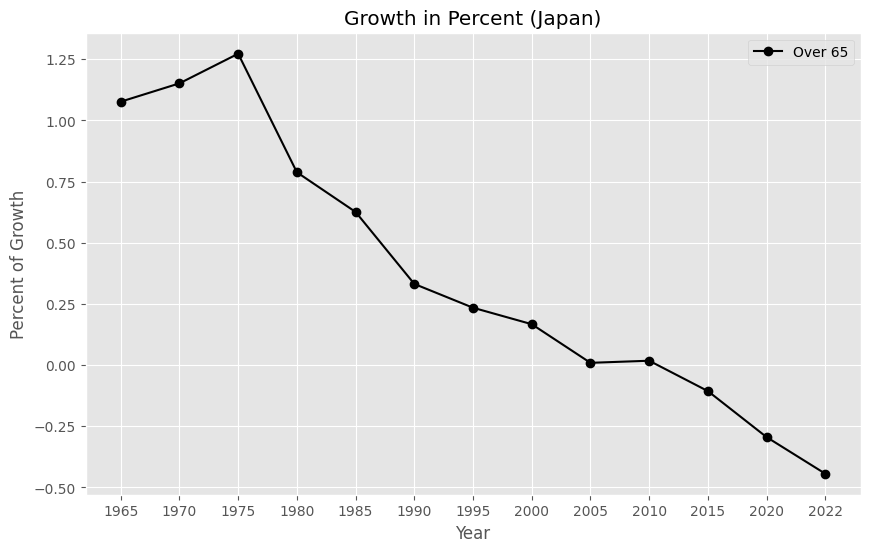

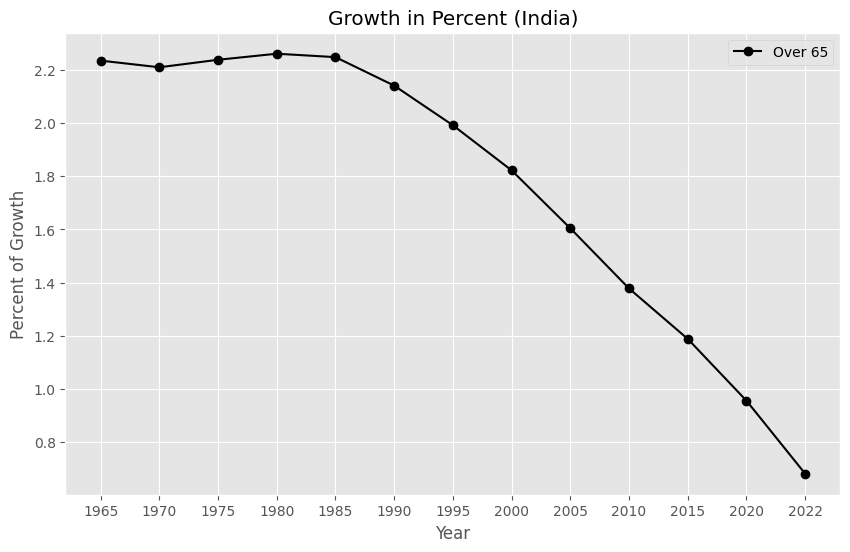

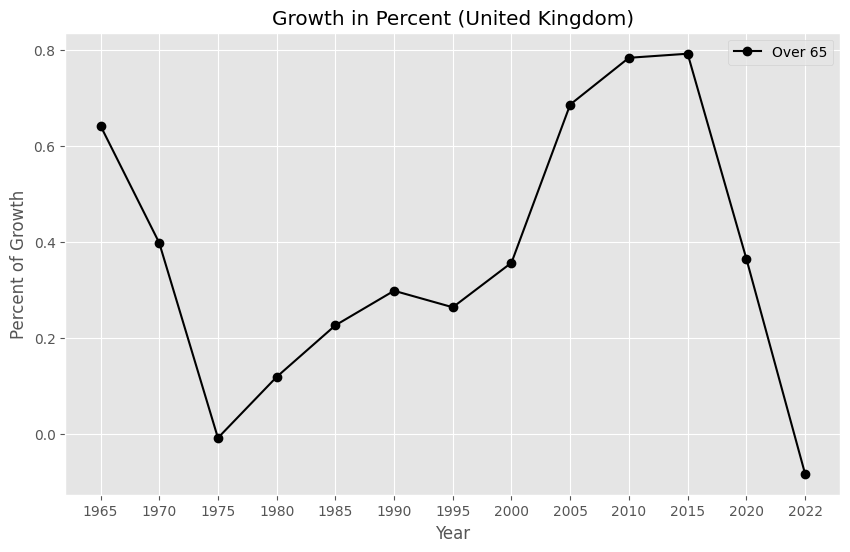

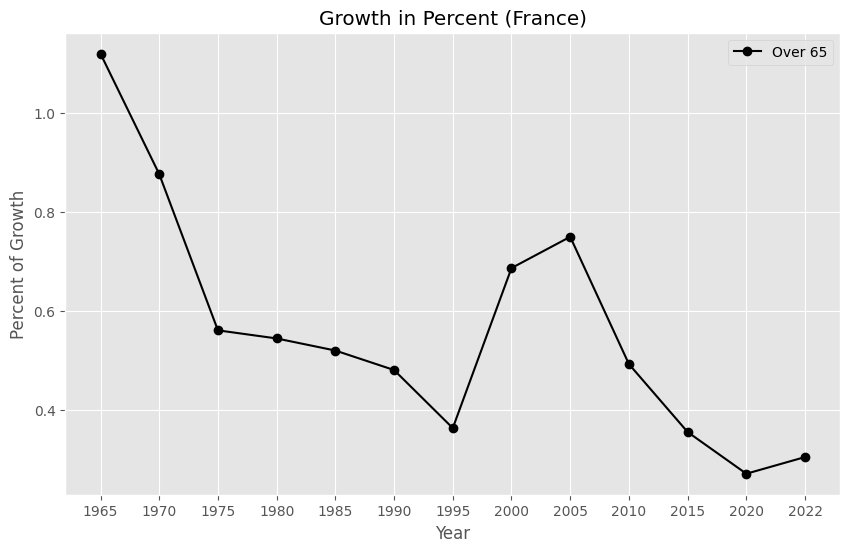

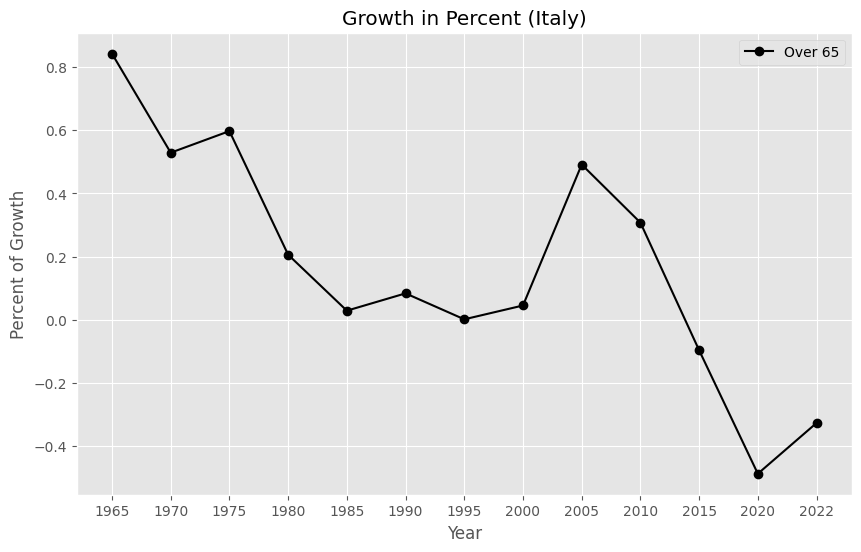

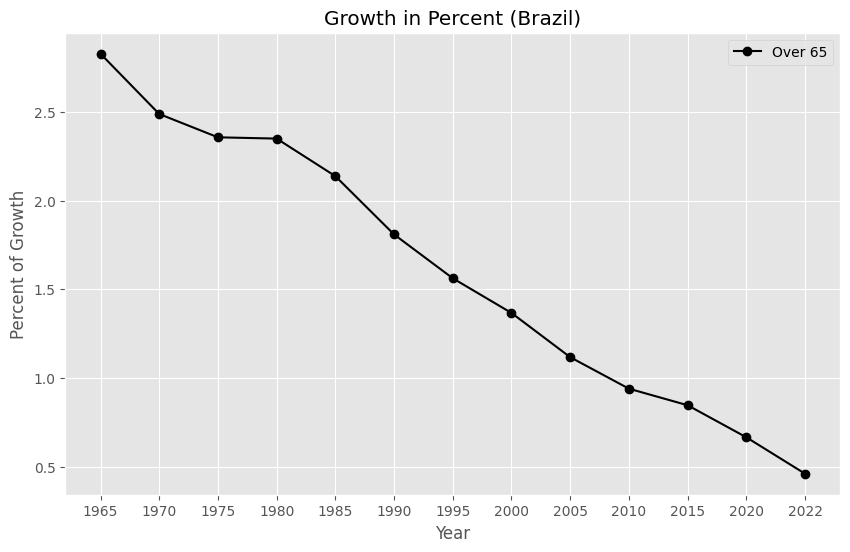

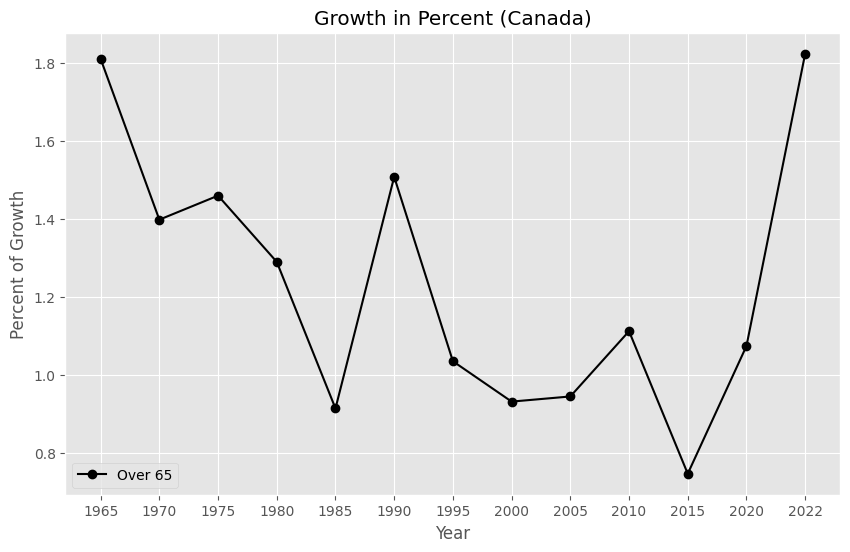

In [17]:
for country in countries:
    plotGrowth(country)

-------------------------------------------------------------------
### Summary Charts of all Countries

Extract and create the series to plot

In [18]:
us_birth, us_death, us_over65, us_growth, us_total = getIndividual('United States')
us_over65_scaled = scalePopulation(us_over65)
us_total_scaled = scalePopulation(us_total)
cn_birth, cn_death, cn_over65, cn_growth, cn_total = getIndividual('China')
cn_over65_scaled = scalePopulation(cn_over65)
cn_total_scaled = scalePopulation(cn_total)
de_birth, de_death, de_over65, de_growth, de_total = getIndividual('Germany')
de_over65_scaled = scalePopulation(de_over65)
de_total_scaled = scalePopulation(de_total)
jp_birth, jp_death, jp_over65, jp_growth, jp_total = getIndividual('Japan')
jp_over65_scaled = scalePopulation(jp_over65)
jp_total_scaled = scalePopulation(jp_total)
in_birth, in_death, in_over65, in_growth, in_total = getIndividual('India')
in_over65_scaled = scalePopulation(in_over65)
in_total_scaled = scalePopulation(in_total)
uk_birth, uk_death, uk_over65, uk_growth, uk_total = getIndividual('United Kingdom')
uk_over65_scaled = scalePopulation(uk_over65)
uk_total_scaled = scalePopulation(uk_total)
fr_birth, fr_death, fr_over65, fr_growth, fr_total = getIndividual('France')
fr_over65_scaled = scalePopulation(fr_over65)
fr_total_scaled = scalePopulation(fr_total)
it_birth, it_death, it_over65, it_growth, it_total = getIndividual('Italy')
it_over65_scaled = scalePopulation(it_over65)
it_total_scaled = scalePopulation(it_total)
br_birth, br_death, br_over65, br_growth, br_total = getIndividual('Brazil')
br_over65_scaled = scalePopulation(br_over65)
br_total_scaled = scalePopulation(br_total)
ca_birth, ca_death, ca_over65, ca_growth, ca_total = getIndividual('Canada')
ca_over65_scaled = scalePopulation(ca_over65)
ca_total_scaled = scalePopulation(ca_total)

Plot birth rates for all countries

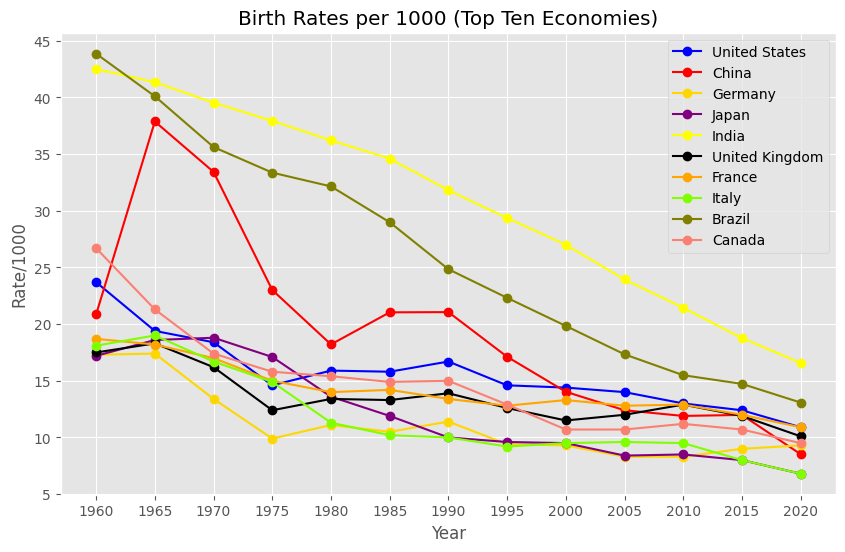

In [19]:
plt.figure(figsize=(10,6))
plt.title('Birth Rates per 1000 (Top Ten Economies)')
plt.xlabel('Year')
plt.ylabel('Rate/1000')
plt.plot(us_birth, color='blue', label='United States', marker='o')
plt.plot(cn_birth, color='red', label='China', marker='o')
plt.plot(de_birth, color='gold', label='Germany', marker='o')
plt.plot(jp_birth, color='purple', label='Japan', marker='o')
plt.plot(in_birth, color='yellow', label='India', marker='o')
plt.plot(uk_birth, color='black', label='United Kingdom', marker='o')
plt.plot(fr_birth, color='orange', label='France', marker='o')
plt.plot(it_birth, color='chartreuse', label='Italy', marker='o')
plt.plot(br_birth, color='olive', label='Brazil', marker='o')
plt.plot(ca_birth, color='salmon', label='Canada', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/sumBirthRates.png', format='png')

Plot death rates for all countries

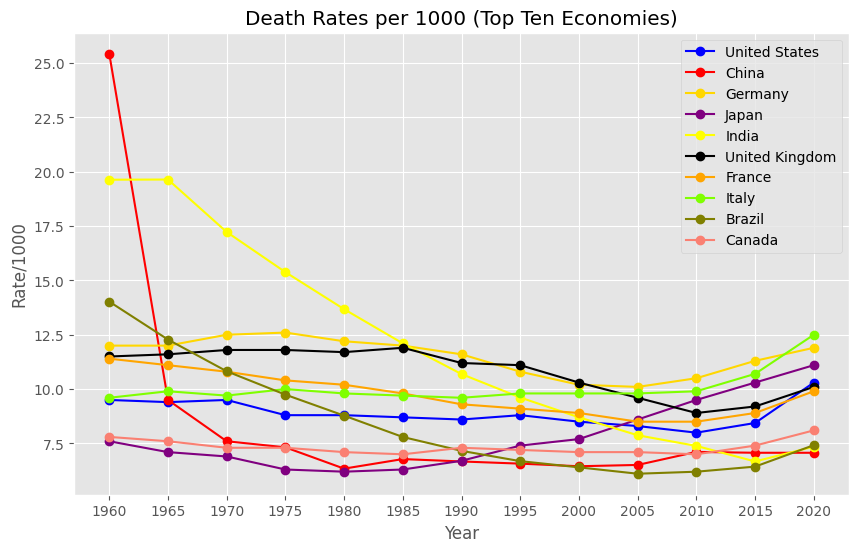

In [20]:
plt.figure(figsize=(10,6))
plt.title('Death Rates per 1000 (Top Ten Economies)')
plt.xlabel('Year')
plt.ylabel('Rate/1000')
plt.plot(us_death, color='blue', label='United States', marker='o')
plt.plot(cn_death, color='red', label='China', marker='o')
plt.plot(de_death, color='gold', label='Germany', marker='o')
plt.plot(jp_death, color='purple', label='Japan', marker='o')
plt.plot(in_death, color='yellow', label='India', marker='o')
plt.plot(uk_death, color='black', label='United Kingdom', marker='o')
plt.plot(fr_death, color='orange', label='France', marker='o')
plt.plot(it_death, color='chartreuse', label='Italy', marker='o')
plt.plot(br_death, color='olive', label='Brazil', marker='o')
plt.plot(ca_death, color='salmon', label='Canada', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/sumDeathRates.png', format='png')

Plot population over 65 for all countries

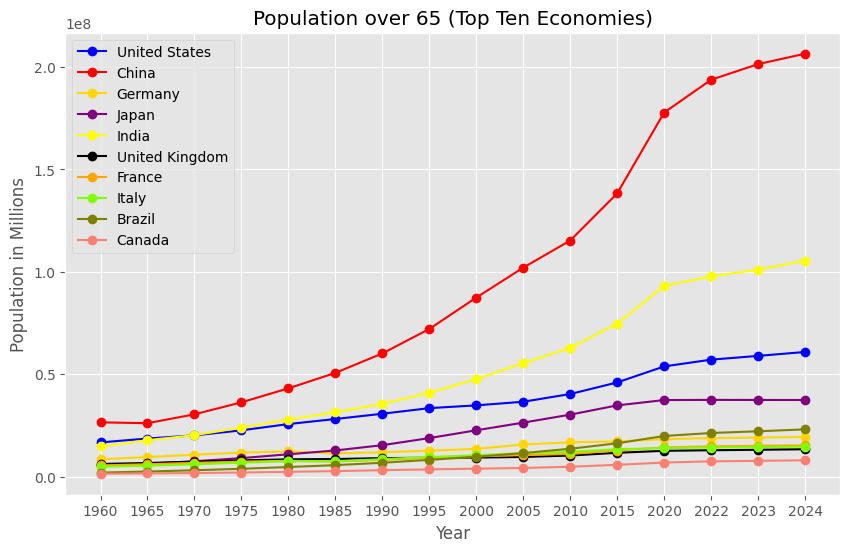

In [21]:
plt.figure(figsize=(10,6))
plt.title('Population over 65 (Top Ten Economies)')
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.plot(us_over65, color='blue', label='United States', marker='o')
plt.plot(cn_over65, color='red', label='China', marker='o')
plt.plot(de_over65, color='gold', label='Germany', marker='o')
plt.plot(jp_over65, color='purple', label='Japan', marker='o')
plt.plot(in_over65, color='yellow', label='India', marker='o')
plt.plot(uk_over65, color='black', label='United Kingdom', marker='o')
plt.plot(fr_over65, color='orange', label='France', marker='o')
plt.plot(it_over65, color='chartreuse', label='Italy', marker='o')
plt.plot(br_over65, color='olive', label='Brazil', marker='o')
plt.plot(ca_over65, color='salmon', label='Canada', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/sumOver65.png', format='png')

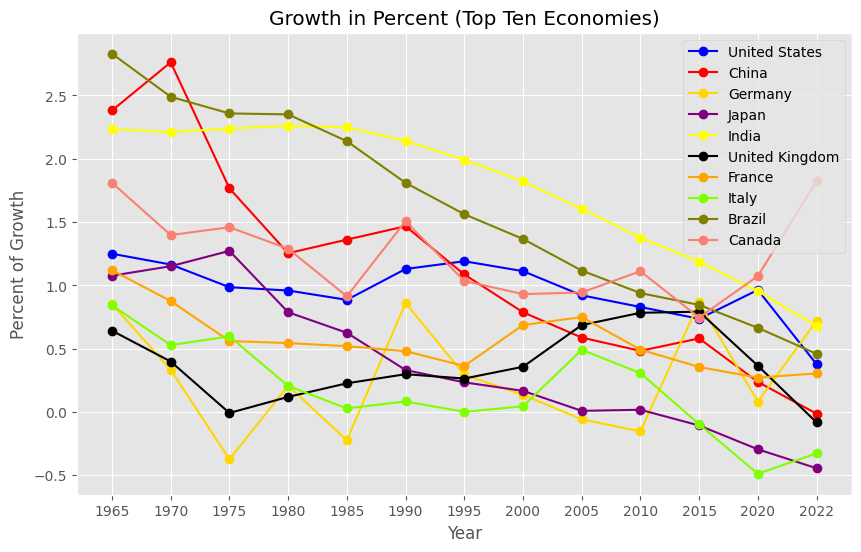

In [22]:
plt.figure(figsize=(10,6))
plt.title('Growth in Percent (Top Ten Economies)')
plt.xlabel('Year')
plt.ylabel('Percent of Growth')
plt.plot(us_growth, color='blue', label='United States', marker='o')
plt.plot(cn_growth, color='red', label='China', marker='o')
plt.plot(de_growth, color='gold', label='Germany', marker='o')
plt.plot(jp_growth, color='purple', label='Japan', marker='o')
plt.plot(in_growth, color='yellow', label='India', marker='o')
plt.plot(uk_growth, color='black', label='United Kingdom', marker='o')
plt.plot(fr_growth, color='orange', label='France', marker='o')
plt.plot(it_growth, color='chartreuse', label='Italy', marker='o')
plt.plot(br_growth, color='olive', label='Brazil', marker='o')
plt.plot(ca_growth, color='salmon', label='Canada', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/sumGowthPercent.png', format='png')

Total Population Summary

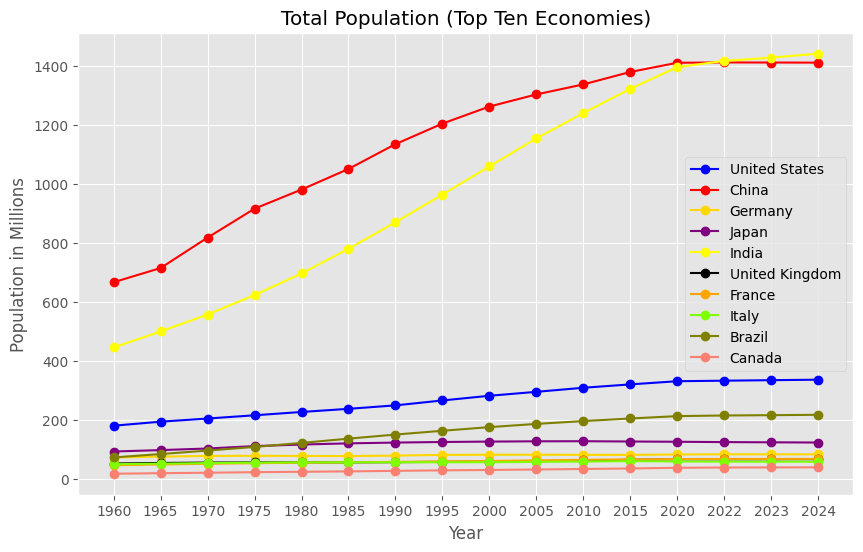

In [23]:
plt.figure(figsize=(10,6))
plt.title('Total Population (Top Ten Economies)')
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.plot(us_total_scaled, color='blue', label='United States', marker='o')
plt.plot(cn_total_scaled, color='red', label='China', marker='o')
plt.plot(de_total_scaled, color='gold', label='Germany', marker='o')
plt.plot(jp_total_scaled, color='purple', label='Japan', marker='o')
plt.plot(in_total_scaled, color='yellow', label='India', marker='o')
plt.plot(uk_total_scaled, color='black', label='United Kingdom', marker='o')
plt.plot(fr_total_scaled, color='orange', label='France', marker='o')
plt.plot(it_total_scaled, color='chartreuse', label='Italy', marker='o')
plt.plot(br_total_scaled, color='olive', label='Brazil', marker='o')
plt.plot(ca_total_scaled, color='salmon', label='Canada', marker='o')
plt.legend()
plt.plot()
plt.savefig('../images/sumTotalPopulation.png', format='png')